[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


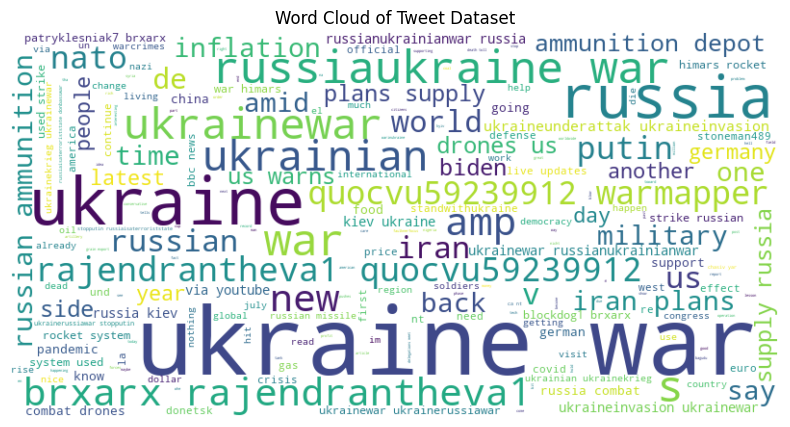

[('', 1216), ('ukraine', 172), ('war', 164), ('russia', 63), ('ukrainewar', 42), ('us', 28)]


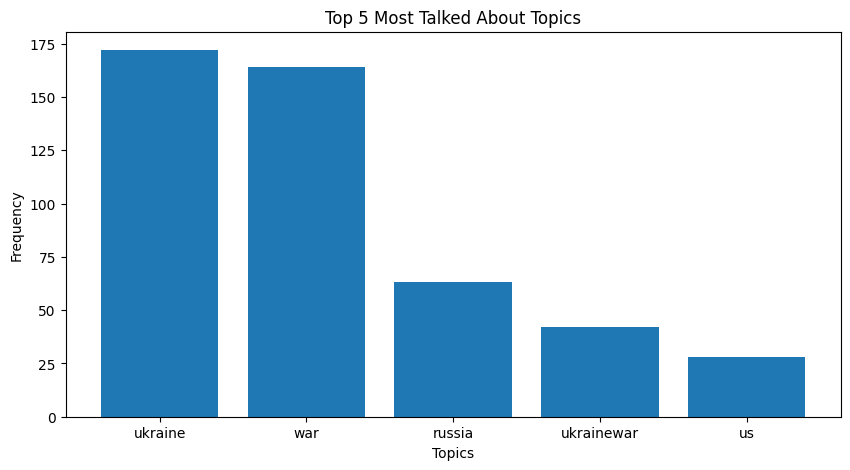

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('stopwords')

# Sample tweet dataset (replace with your actual dataset)
tweets_df = pd.read_csv('k_tweets.csv',encoding='latin1')
tweets = tweets_df['tweet'].tolist()

# Tokenize tweets
tokenized_tweets = []
for tweet in tweets:
    tokens = nltk.word_tokenize(tweet.lower())  # Convert to lowercase
    tokenized_tweets.extend(tokens)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tweets = [word for word in tokenized_tweets if word not in stop_words]

# Remove special characters
filtered_tweets = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in filtered_tweets]
filtered_tweets = [word for word in filtered_tweets if word!='https']

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tweets))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Dataset')
plt.show()

# Get word counts
word_counts = Counter(filtered_tweets)

# Get top 5 most talked about topics
top_topics = word_counts.most_common(6)
print(top_topics)

# Extract topics and frequencies
topics = [topic[0] for topic in top_topics if topic[0]!=""]
frequencies = [topic[1] for topic in top_topics if topic[0]!=""]

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(topics, frequencies)
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Top 5 Most Talked About Topics')
plt.show()